In [ ]:
import pyvista
grid = pyvista.UniformGrid(dimensions=(2, 2, 2))
grid.points.tolist()

In [1]:
# importing sys
import sys

import matplotlib.pyplot as plt

#Path to the module
path_to_module = '/home/victor/lethe/lethe/contrib/postprocessing/'
path_to_module_windows =  '\\\\wsl$\\Ubuntu-22.04\\home\\victor\\lethe\\lethe\\contrib\\postprocessing'

sys.path.append(path_to_module)
sys.path.append(path_to_module_windows)

from lethe_pyvista_tools import *

#case_path = "/mnt/d/particles_props/restitution/high_velocity/liquid_fluidized_bed_0.01"
case_path = "D:\\particles_props\\restitution\\low_velocity\\liquid_fluidized_bed_0.9"

particles = lethe_pyvista_tools(case_path = case_path, prm_file_name = "liquid_fluidized_bed.prm")

#particles.read_lethe_to_pyvista(pvd_name = "out.pvd", interval=5)

particles.read_lethe_to_pyvista(pvd_name = "result__particles.pvd")

particles.get_cylindrical_coords()


Successfully constructed. To see the .prm dictionary, print($NAME.prm_dict)


Reading VTU files: 100%|██████████| 201/201 [00:16<00:00, 12.35it/s]


Written .df[timestep] from timestep = 0 to timestep = 200


Getting cylindrical coords: 100%|██████████| 201/201 [00:01<00:00, 159.78it/s]


In [2]:
particles.mixing_index_doucet(reference_time_step = 30, use_cyl=True, increasing_index = False)

Calculating mixing index: 100%|██████████| 201/201 [00:05<00:00, 35.89it/s]


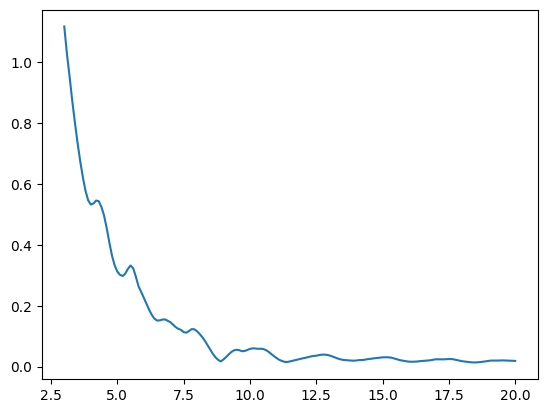

In [3]:
plt.plot(particles.time_list[30:], particles.mixing_index[30:])
plt.show()

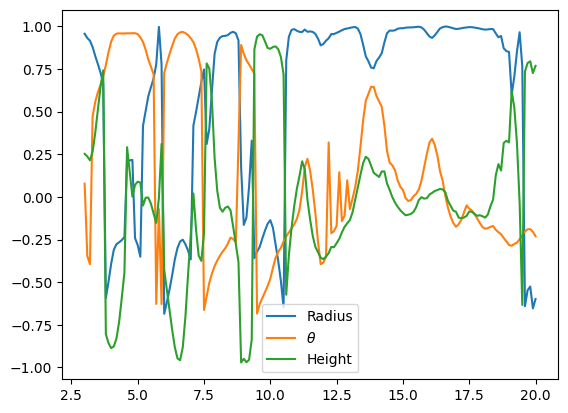

In [6]:
plt.plot(particles.time_list[30:], particles.mixing_eigenvector[30:][:, 0], label = "Radius")
plt.plot(particles.time_list[30:], particles.mixing_eigenvector[30:][:, 1], label = R"$\theta$")
plt.plot(particles.time_list[30:], particles.mixing_eigenvector[30:][:, 2], label = "Height")
plt.legend()

In [ ]:
reference_time_step = 10

particles.array_modifier(array_name = "height_color", condition = "x > -0.33", array_values = 1, restart_array = False, reference_time_step = reference_time_step)

particles.array_modifier(array_name = "radius_color", condition = "(z**2 + y**2)**(1/2) > 0.03", array_values = 1, restart_array = False, reference_time_step = reference_time_step)

particles.array_modifier(array_name = "theta_color", condition = "z > 0", array_values = 1, restart_array = False, reference_time_step = reference_time_step)

In [ ]:
import numpy as np

n_ID_height = n_ID_radius = n_ID_theta = []

pbar = tqdm(total = len(particles.df))
for df in particles.df:
    ID_height = [df["ID"][i] for i in range(len(df["ID"])) if df["height_color"][i] > 0 and df.points[:, 0][i] < -0.33]
    ID_radius = [df["ID"][i] for i in range(len(df["ID"])) if df["radius_color"][i] > 0 and np.sqrt(np.square(df.points[:, 2][i]) + np.square(df.points[:, 1][i])) < 0]
    ID_theta = [df["ID"][i] for i in range(len(df["ID"])) if df["theta_color"][i] > 0 and df.points[:, 2][i] < 0]
    
    n_ID_height.append(len(ID_height))
    n_ID_radius.append(len(ID_radius))
    n_ID_theta.append(len(ID_theta))

    pbar.update(1)
    
    

plt.plot(particles.time_list[reference_time_step:], n_ID_height[reference_time_step+1:], label = "Height")
plt.plot(particles.time_list[reference_time_step:], n_ID_radius[reference_time_step+1:], label = "Radius")
plt.plot(particles.time_list[reference_time_step:], n_ID_theta[reference_time_step+1:], label = R"\theta")
plt.xlabel("Time (s)")
plt.ylabel("Number of particles")
plt.legend()
plt.show()